In [2]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [39]:
## Dfs
df1 = pd.read_csv("01.csv")
y1 = df1.values #3.1
df2 = pd.read_csv("02.csv")
y2 = df2.values #3.2
df3 = pd.read_csv("03.csv")
y3 = df3.values #3.3
df4 = pd.read_csv("04.csv")
y4 = df4.values #3.4

# 3.1 Repetitividade

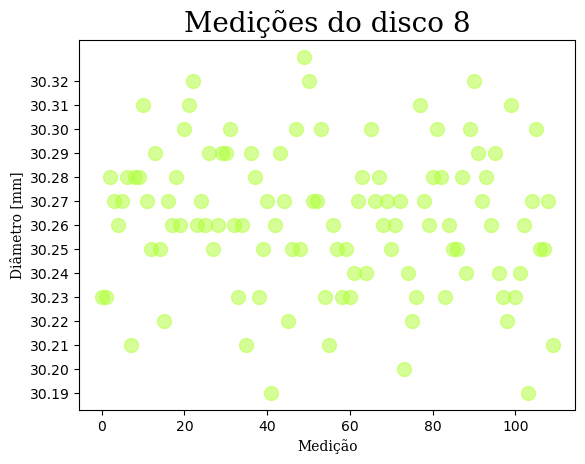

In [40]:
## Gráfico para disco 8
plt.scatter(np.arange(len(y1)), y1, c="greenyellow", alpha=0.5, s=100)
plt.xlabel("Medição", font='serif')
plt.ylabel("Diâmetro [mm]", font='serif')
plt.yticks(np.arange(y1.min(),y1.max(),0.01))
plt.title("Medições do disco 8",font='serif',fontsize=20)
plt.show()

#### O gráfico acima mostra os 110 valores das medições para o diâmetro 8.

In [41]:
## Cálculo t de student
t = scipy.stats.t.ppf(q=0.95,df=110-1)
print("t de student para n=110-1 e 95%: {}".format(t))

t de student para n=110-1 e 95%: 1.6589534581903567


In [42]:
## Cálculo de Re
u1 = y1.std()
print("Std: {}".format(u1))
re1 = u1 * t
print("Re: {}".format(re1))

Std: 0.02937024974779632
Re: 0.04872387738702116


#### A repetitividade para esse conjunto de medições foi de [0.04872387738702116]

# 3.2 Tendência e Correção

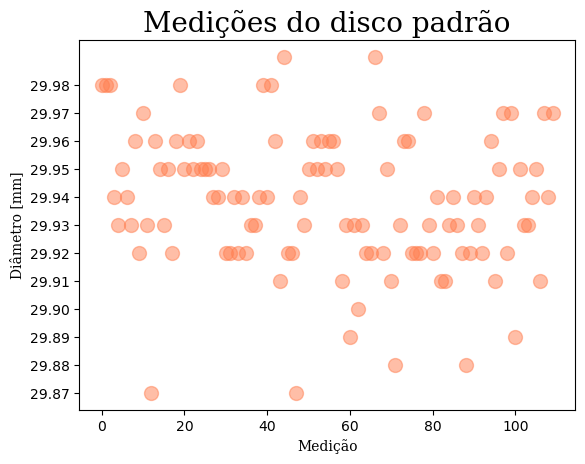

In [43]:
## Gráfico para diâmetro padrão
plt.scatter(np.arange(len(y2)), y2, c="coral", alpha=0.5, s=100)
plt.xlabel("Medição", font='serif')
plt.ylabel("Diâmetro [mm]", font='serif')
plt.yticks(np.arange(y2.min(),y2.max(),0.01))
plt.title("Medições do disco padrão",font='serif',fontsize=20)
plt.show()

#### O gráfico acima mostra os 110 valores do diâmetro do disco padrão medidos.

In [44]:
## Cálculo da tendência
m2 = y2.mean()
td2 = 30 - m2
c2 = td2 * -1
print("Média: {}".format(m2))
print("Tendência: {}".format(td2))
print("Correção: {}".format(c2))

Média: 29.938363636363636
Tendência: 0.06163636363636371
Correção: -0.06163636363636371


#### O valor da tendência calculado foi de [0.06163636363636371]
#### O valor da correção foi de [-0.06163636363636371]

In [45]:
## Cálculo da incerteza da repetitividade
repa2 = (t*y2.std()) / np.sqrt(110)

print("Rep:+/-{}".format(repa2))

Rep:+/-0.00389513209918438


#### Encontramos o valor de [+/- 0.00389513209918438] que é baixo comparando com o diâmetro de 30mm, por isso os valores de incerteza são coerentes.

# 3.3 Determinação do diâmetro de um disco

### 3.3 (a)

#### O diâmetro medido foi de 29,8mm.

In [46]:
diamax = 29.8 + c2 + repa2
diamin = 29.8 + c2 - repa2
dia = 29.8 + c2
print("d max: {}".format(diamax))
print("d min: {}".format(diamin))
print("d: {}".format(dia))

d max: 29.742258768462822
d min: 29.734468504264452
d: 29.738363636363637


#### Considerando os valores de correção e repetitividade encontramos os valores de diâmetro: [29,73mm; 29,74mm; 29, 74mm] que estão fora da faixa de tolerância de 29,80mm - 30,20 mm

### 3.3 (b)

In [47]:
diamax2 = y3.mean() + c2 + repa2
diamin2 = y3.mean() + c2 - repa2
dia2 = y3.mean() + c2
print("d max: {}".format(diamax2))
print("d min: {}".format(diamin2))
print("d: {}".format(dia2))

d max: 29.717076950281005
d min: 29.709286686082635
d: 29.71318181818182


#### Considerando os valores de correção e incerteza da repetitividade encontramos os valores de diâmetro: [29,72mm; 29,71mm; 29, 71mm] que estão fora da faixa de tolerância de 29,80mm - 30,20 mm

# 3.4 Classificação dos discos

### 3.4 (a) Os limites de aceitação são dentro da faixa de 29,80mm - 30,20mm considerando a faixa da incerteza de +/- 0.04 para ambos limites.

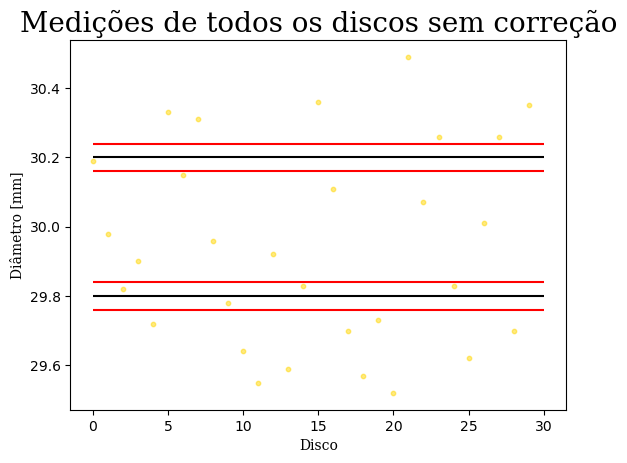

In [136]:
## Gráfico de todos os discos
plt.scatter(np.arange(len(y4)), y4, c="gold", alpha=0.5, s=10)
plt.xlabel("Disco", font='serif')
plt.ylabel("Diâmetro [mm]", font='serif')
plt.title("Medições de todos os discos sem correção",font='serif',fontsize=20)
plt.hlines(29.80, 0, 30, color='black')
plt.hlines(30.20, 0, 30,color='black')
plt.hlines(29.84, 0, 30, color='red')
plt.hlines(30.16, 0, 30,color='red')
plt.hlines(29.76, 0, 30, color='red')
plt.hlines(30.24, 0, 30,color='red')
plt.show()

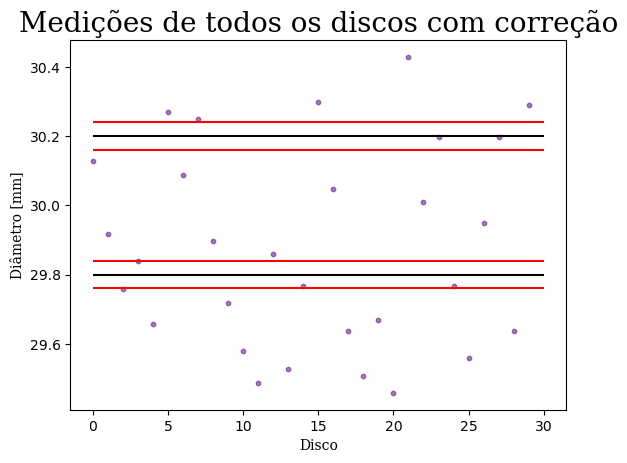

In [135]:
## Gráfico de todos os discos com correção
plt.scatter(np.arange(len(y4)), y4 + c2, c="indigo", alpha=0.5, s=10)
plt.xlabel("Disco", font='serif')
plt.ylabel("Diâmetro [mm]", font='serif')
plt.title("Medições de todos os discos com correção",font='serif',fontsize=20)
plt.hlines(29.80, 0, 30, color='black')
plt.hlines(30.20, 0, 30,color='black')
plt.hlines(29.84, 0, 30, color='red')
plt.hlines(30.16, 0, 30,color='red')
plt.hlines(29.76, 0, 30, color='red')
plt.hlines(30.24, 0, 30,color='red')
plt.show()

In [137]:
l4 = df4.to_numpy() + c2
i=0
for l in l4:
    i+=1
    if l > 30.24:
        print("Disco {} acima do limite superior".format(i))
        ac = i
    if l < 29.76:
        print("Disco {} abaixo do limite inferior".format(i))
    if l >= 30.16 and l <= 30.24:
        print("Disco {} na zona superior de dúvida".format(i))
    if l <= 29.84 and l >= 29.76:
        print("Disco {} na zona inferior de dúvida".format(i))
    if l < 30.16 and l > 29.84:
        print("Disco {} dentro da faixa adequada".format(i))


Disco 1 dentro da faixa adequada
Disco 2 dentro da faixa adequada
Disco 3 abaixo do limite inferior
Disco 4 na zona inferior de dúvida
Disco 5 abaixo do limite inferior
Disco 6 acima do limite superior
Disco 7 dentro da faixa adequada
Disco 8 acima do limite superior
Disco 9 dentro da faixa adequada
Disco 10 abaixo do limite inferior
Disco 11 abaixo do limite inferior
Disco 12 abaixo do limite inferior
Disco 13 dentro da faixa adequada
Disco 14 abaixo do limite inferior
Disco 15 na zona inferior de dúvida
Disco 16 acima do limite superior
Disco 17 dentro da faixa adequada
Disco 18 abaixo do limite inferior
Disco 19 abaixo do limite inferior
Disco 20 abaixo do limite inferior
Disco 21 abaixo do limite inferior
Disco 22 acima do limite superior
Disco 23 dentro da faixa adequada
Disco 24 na zona superior de dúvida
Disco 25 na zona inferior de dúvida
Disco 26 abaixo do limite inferior
Disco 27 dentro da faixa adequada
Disco 28 na zona superior de dúvida
Disco 29 abaixo do limite inferior
D

### Os discos foram classificados acima.

### 3.4 (b)

#### Os discos 4, 15, 24, 25, 28 estão nas zonas de dúvida, por isso serão medidos 110 vezes e analisaremos os valores da média dados pelo paquímetro digital.

#### Média disco 4: 29,937mm - Reclassificado: dentro da faixa adequada

#### Média disco 15:  29,760mm - Manteve classificação anterior

#### Média disco 24: 30,256mm - Reclassificado: acima do limite superior

#### Média disco 25: 29,859mm - Reclassificado: dentro da faixa adequada

#### Média disco 28: 30,256mm - Reclassificado: acima do limite superior